In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset for the model
df=pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#Reading the shape of the datset and analysing the data
print("The shape of dataset: ",df.shape)
print(df.info())

The shape of dataset:  (5572, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [4]:
#Preprocessing the data
#As the target feature is in text we use a label encoder to rescale the dataset
encoder=LabelEncoder()
df['Category']=encoder.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
#Checking for null values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
#checking for duplicate values
if df.duplicated().sum():
    df=df.drop_duplicates(keep='first')

In [7]:
#Exploratory Data Analysis


In [8]:
df['Category'].value_counts()

0    4516
1     641
Name: Category, dtype: int64

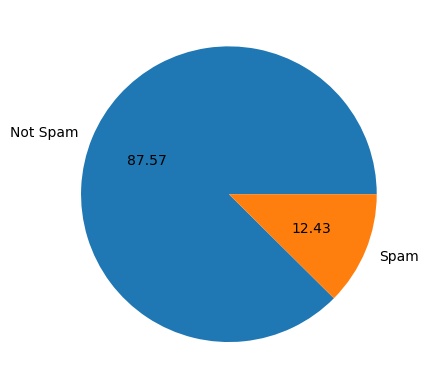

In [9]:
plt.pie(df['Category'].value_counts(),labels=['Not Spam','Spam'],autopct="%0.2f")
plt.show()

In [10]:
#Data is imbalanced
#Using the natural language tool kit
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\veera\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
df['Char count']=df['Message'].apply(len)

In [12]:
df.head()

,Category,Message,Char count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
#Number of words
df['Word count']=df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [14]:
df.head()

,Category,Message,Char count,Word count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [15]:
#Number of sentences
df['Sentance count']=df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [16]:
df[['Char count','Word count','Sentance count']].describe()

,Char count,Word count,Sentance count
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [17]:
df[df['Category']==0][['Char count','Word count','Sentance count']].describe()

,Char count,Word count,Sentance count
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [18]:
df[df['Category']==1][['Char count','Word count','Sentance count']].describe()

,Char count,Word count,Sentance count
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='Char count', ylabel='Count'>

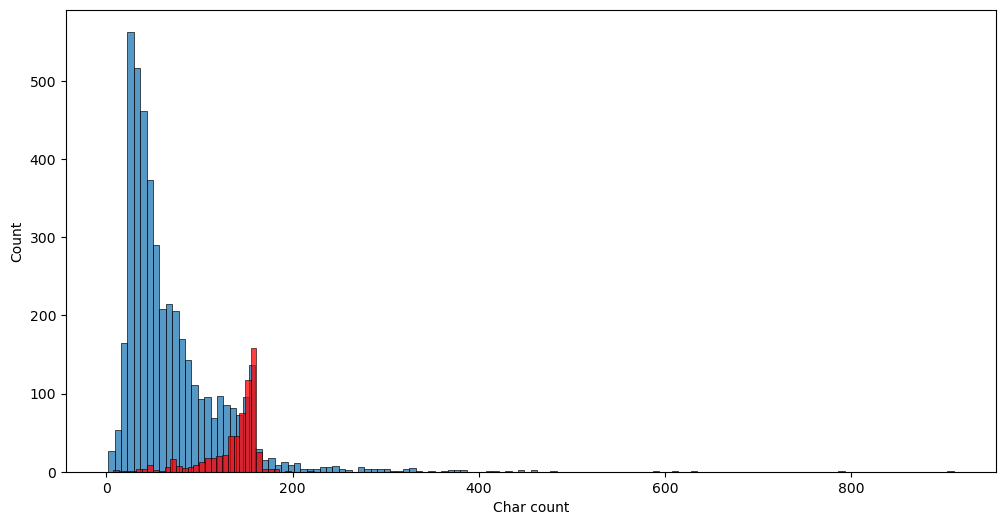

In [19]:
import seaborn as sb
plt.figure(figsize=(12,6))
sb.histplot(df[df['Category']==0]['Char count'])
sb.histplot(df[df['Category']==1]['Char count'],color='red')

<Axes: xlabel='Word count', ylabel='Count'>

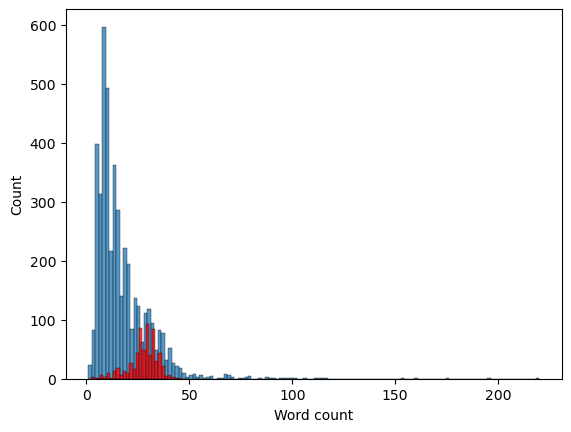

In [20]:
sb.histplot(df[df['Category']==0]['Word count'])
sb.histplot(df[df['Category']==1]['Word count'],color='red')

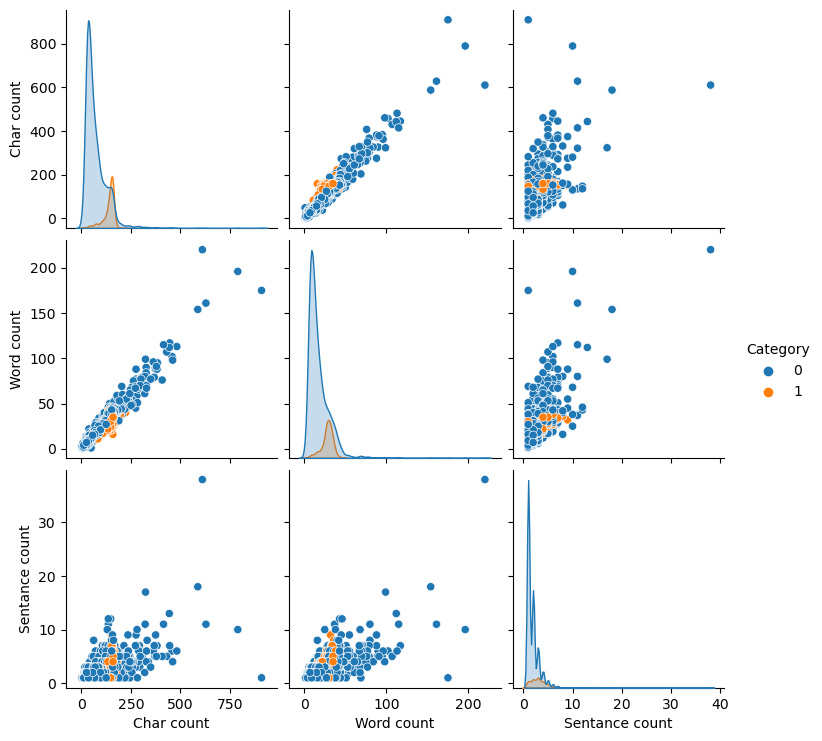

In [21]:
sb.pairplot(df,hue='Category')

C:\Users\veera\AppData\Local\Temp\ipykernel_2300\3264164387.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(),annot=True)


<Axes: >

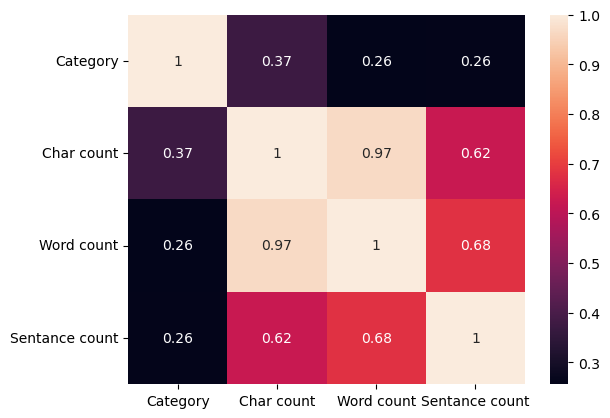

In [22]:
sb.heatmap(df.corr(),annot=True)

In [23]:
#Data Preprocessing
""""Lower Case
Tokenization
Removing Special Chararacters
Removing stop words and punctuation
Stemming"""
from nltk.corpus import stopwords
stopwords.words('english')
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
!pip install wordcloud

In [24]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [25]:
df['Text']=df['Message'].apply(transform_text)

In [26]:
df.head()

,Category,Message,Char count,Word count,Sentance count,Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [27]:
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500,min_font_size=10,background_color='black')

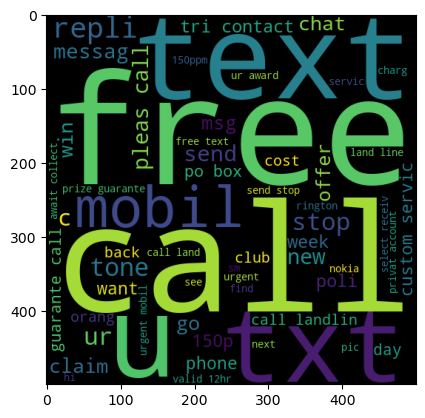

In [28]:
spam_wc=wc.generate(df[df['Category']==1]['Text'].str.cat(sep=" "))
plt.imshow(spam_wc)

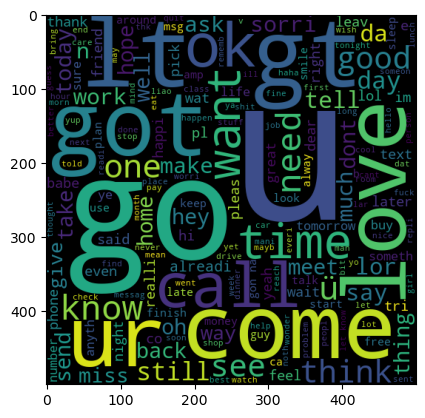

In [29]:
ham_wc=wc.generate(df[df['Category']==0]['Text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [30]:
spam_corpus=[]
for msg in df[df['Category']==1]['Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9781

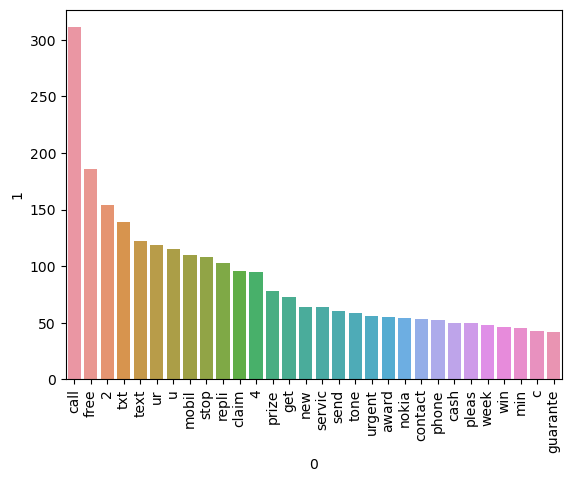

In [31]:
from collections import Counter
spam_words=pd.DataFrame(Counter(spam_corpus).most_common(30))
sb.barplot(data=spam_words,x=spam_words[0],y=spam_words[1])
plt.xticks(rotation='vertical')
plt.show()

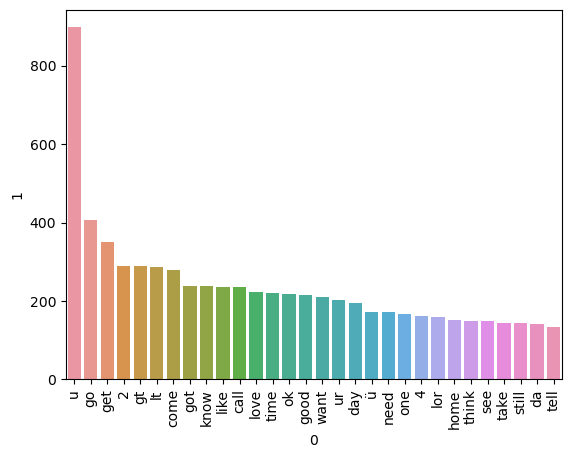

In [32]:
ham_corpus=[]
for msg in df[df['Category']==0]['Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
ham_words=pd.DataFrame(Counter(ham_corpus).most_common(30))
sb.barplot(data=ham_words,x=ham_words[0],y=ham_words[1])
plt.xticks(rotation='vertical')
plt.show()

In [33]:
#Model Building
Naive Bayes ALgorithm

SyntaxError: invalid syntax (1381642620.py, line 2)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
#Hyper parameter tuning for 3000
tfidf=TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df['Text']).toarray()

In [44]:
X.shape
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
Y=df['Category'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [47]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
mnb= MultinomialNB()

In [48]:
mnb.fit(X_train,Y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9709302325581395
[[905   0]
 [ 30  97]]
1.0


In [49]:
#TfidfVectorizer-->MNB Because of the precision score and accuracy
#So we choose Multinomial Naive Bayes

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))